In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
img = image.load_img(r"C:\Users\prajwal\Downloads\dogImage.jpg", target_size = (200,200))   # opencv.imread <- for cv2.

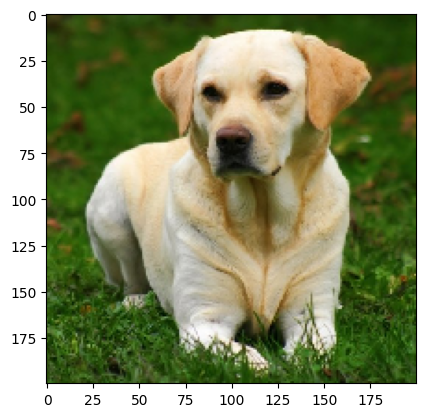

In [4]:
plt.imshow(img)

In [5]:
type(img)

PIL.Image.Image

In [6]:
# It is python Image Library not numpy array

In [7]:
# Applying Data Augmentation

In [8]:
datagen = ImageDataGenerator(
    # Defining Transformations
    rotation_range = 30,       # Generate new Image by rotating it 30Degree.
    shear_range = 0.2,         # distorting image
    zoom_range = 0.2,          # zoom range
    horizontal_flip = True,    # can also use vertical_flip but it can train wrongly the model
    width_shift_range = 0.2,   # shifting of image horizontally
    height_shift_range = 0.2,  # shifting image vertically
    fill_mode = 'nearest'        # can also use constant etc
)

In [9]:
img = image.img_to_array(img)  # will convert to numpy array

In [10]:
img.shape

(200, 200, 3)

In [11]:
input_batch = img.reshape(1,200,200,3) # We have to add extra dimension

**For Single Image**

In [12]:
i = 0

for output in datagen.flow(input_batch, batch_size = 1, save_to_dir = r"C:\Users\prajwal\Downloads\Data_Augmentation_SingleImage"):     # Use for single image processing -> flow
    i = i + 1                                                                     # output will have 1 more batch
                                                                                  # storing image in 'aug' directory
                                                                                  # will run infintely, therefore restricting to 10 images only
    if i == 10:
        break

In [13]:
input_batch.shape

(1, 200, 200, 3)

**Multiple Images**

In [14]:
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale = 1./255,    
    shear_range = 0.2,         
    zoom_range = 0.2,          
    horizontal_flip = True,    
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(                  # flow is replaced by flow_from _directory
    r"C:\Users\prajwal\Downloads\Data_Augmentation\dogDataset",
    target_size=(150,150),
    batch_size = batch_size,
    class_mode = 'binary'                                             # since we use binary_crossentropy loss, we need binary labels
)

validation_generator = test_datagen.flow_from_directory(
    r"C:\Users\prajwal\Downloads\Data_Augmentation\Data_Augmentation_MultipleImages_Validation",
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [15]:
# Will use fit_generator instead of fit after compiling model

In [16]:
# We will also use train_generator